In [230]:
# from google.colab import drive
# drive.mount('/content/drive')

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the Data

In [232]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/train(1).csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/test (1).csv')

In [233]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


CHECKING FOR THE PATTERN

Calculating the percentage of male and female passengers who survived

In [234]:
women = train_df.loc[train_df.Sex == 'female']['Survived']
women_rate = sum(women)/len(women)

In [235]:
women_rate

0.7420382165605095

In [236]:
men = train_df.loc[train_df.Sex == 'male']['Survived']
men_rate = sum(men)/len(men)

In [237]:
men_rate

0.18890814558058924

The above code tells us the percetage of male and female passengers who survived.

We can clearly see that almost 75% women onboard survived while onlu 19% men were able to survive. Therefore, we can conclude that Gender seems to be a strong indicator of survival.

In [238]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [239]:
train_df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [240]:
train_df.isnull().sum()
# We can drop the cabin as it has many null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [241]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [242]:
train_df = train_df.drop('Cabin', axis=1)
test_df = test_df.drop('Cabin', axis=1)

In [243]:
train_df[train_df['Embarked'].isnull()]
# We can remove these 2 rows so we can replace all null values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [244]:
train_df = train_df.drop([61,829])

Filling the age clolumn with median values as it can be an important feature

In [245]:
median_age = train_df['Age'].median()
median_age

28.0

In [246]:
train_na_index = train_df[train_df['Age'].isnull()].index

for i in train_na_index:
  train_df['Age'][i] = median_age

<ipython-input-246-6d4d42d7e381>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Age'][i] = median_age


In [247]:
train_df['Age'].isnull().sum()

0

Same with test data


In [248]:
median_age = test_df['Age'].median()
median_age

27.0

In [249]:
test_na_index = test_df[test_df['Age'].isnull()].index

for i in test_na_index:
  test_df['Age'][i] = median_age

<ipython-input-249-9e0a6efbae00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Age'][i] = median_age


In [250]:
test_df['Age'].isnull().sum()

0

In [251]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [252]:
test_df = test_df.drop(152)

In [253]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [254]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now the data is fully cleaned and we are ready to build a machine learning model

We will be building Random Forest model.

In [255]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = pd.get_dummies(train_df[features], drop_first=True)

y = train_df['Survived']

X_test = pd.get_dummies(test_df[features], drop_first=True)

In [256]:
from sklearn.ensemble import RandomForestClassifier

In [257]:
model = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=101)


In [258]:
model.fit(X,y)


RandomForestClassifier(random_state=101)

Predicting on the training model to check the accuracy of the model

In [259]:
preds = model.predict(X)

In [260]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [261]:
print(classification_report(y, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       549
           1       0.98      0.96      0.97       340

    accuracy                           0.98       889
   macro avg       0.98      0.98      0.98       889
weighted avg       0.98      0.98      0.98       889



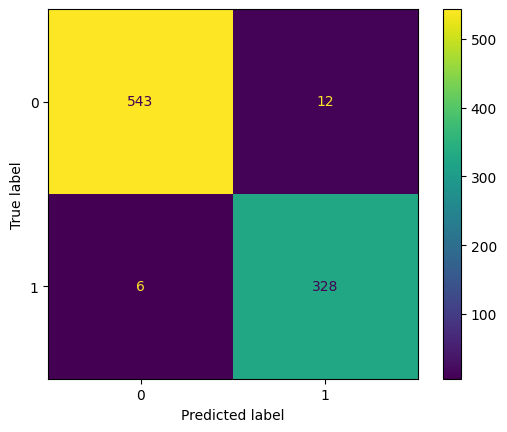

In [262]:
c_matrix = confusion_matrix(preds,y)
cm_display = ConfusionMatrixDisplay(c_matrix)
cm_display.plot();

We are getting an accuracy Score of 98%

Hence our model is working with 98% efficiency

In [263]:
# Now predicting for the Test data
y_preds = model.predict(X_test)
y_preds

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

Uploading the model

In [266]:
import joblib

joblib.dump(model,'final_model.pkl')

['final_model.pkl']

Loading the model

In [267]:
loaded_model = joblib.load('final_model.pkl')

In [281]:
loaded_model.predict([[3,0,38,1,0,55,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])